In [36]:
from scr.models.tfidf_text_classifier.model import TfidfTextClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('questions.csv').astype('U')
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [38]:
model = TfidfTextClassifier()
model.fit(X_train, y_train)

In [39]:
predictions = []
for idx in range(len(X_test)):
    message = X_test.iloc[idx]
    result = model.predict(message)
    predictions.append(result)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4799
           1       0.76      0.21      0.33       213

    accuracy                           0.96      5012
   macro avg       0.86      0.60      0.66      5012
weighted avg       0.96      0.96      0.95      5012



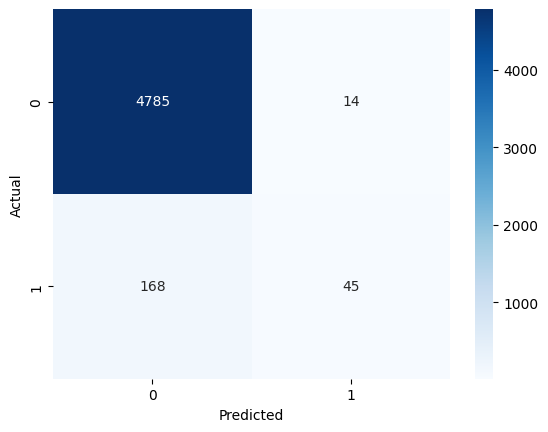

In [40]:
print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()